In [14]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv("C:/Users/dell/OneDrive/Desktop/coursese_machinfy/session7/tips.csv")
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [21]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [18]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [19]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [20]:
df.describe(include='object')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [26]:
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['day'].value_counts())
print(df['time'].value_counts())
  

Male      157
Female     87
Name: sex, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64


In [30]:
grouped_sex = df.groupby('sex').agg({'tip': 'mean', 'total_bill': 'mean'})
grouped_sex


,tip,total_bill
sex,,
Female,2.833448,18.056897
Male,3.089618,20.744076


In [31]:
grouped_smoker = df.groupby('smoker').agg({'tip': 'mean', 'total_bill': 'mean'})
grouped_smoker

,tip,total_bill
smoker,,
No,2.991854,19.188278
Yes,3.008710,20.756344


In [33]:
grouped_day = df.groupby('day').agg({'tip': 'mean', 'total_bill': 'mean'})
grouped_day


,tip,total_bill
day,,
Fri,2.734737,17.151579
Sat,2.993103,20.441379
Sun,3.255132,21.410000
Thur,2.771452,17.682742


In [39]:
grouped_time = df.groupby('time').agg({'tip': 'mean', 'total_bill': 'mean'})
grouped_time

,tip,total_bill
time,,
Dinner,3.102670,20.797159
Lunch,2.728088,17.168676


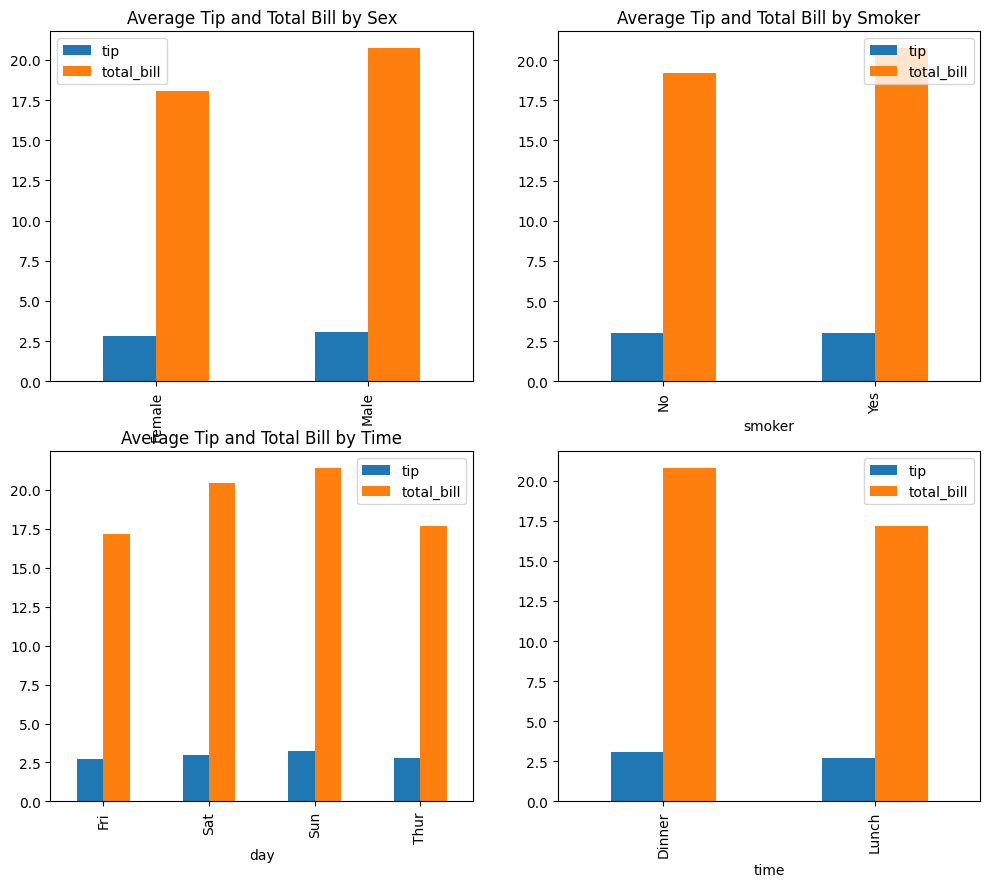

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

grouped_sex.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Average Tip and Total Bill by Sex')

grouped_smoker.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Average Tip and Total Bill by Smoker')

grouped_day.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Average Tip and Total Bill by Day')

grouped_time.plot(kind='bar', ax=axes[1, 1])
axes[1, 0].set_title('Average Tip and Total Bill by Time')

plt.show()

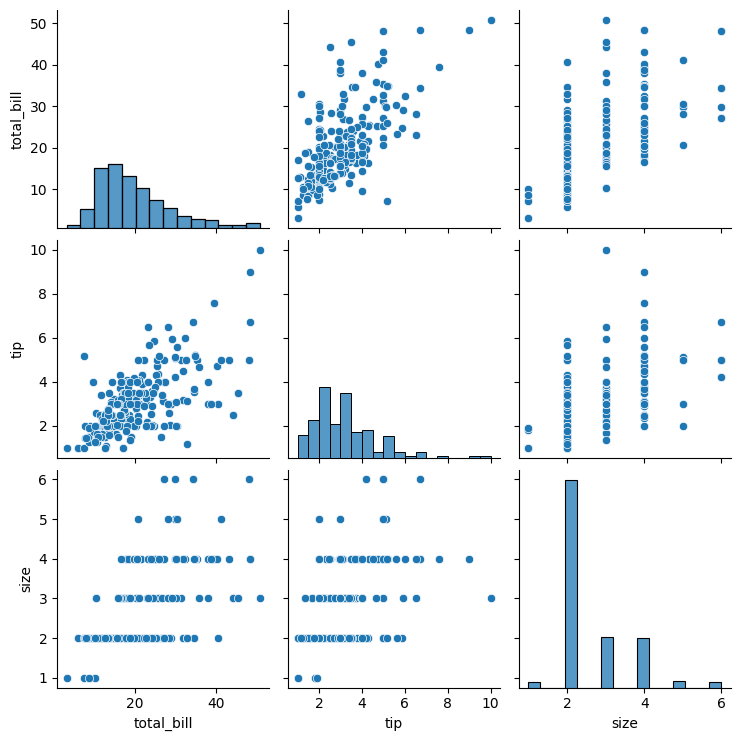

In [28]:
sns.pairplot(df)
plt.show()

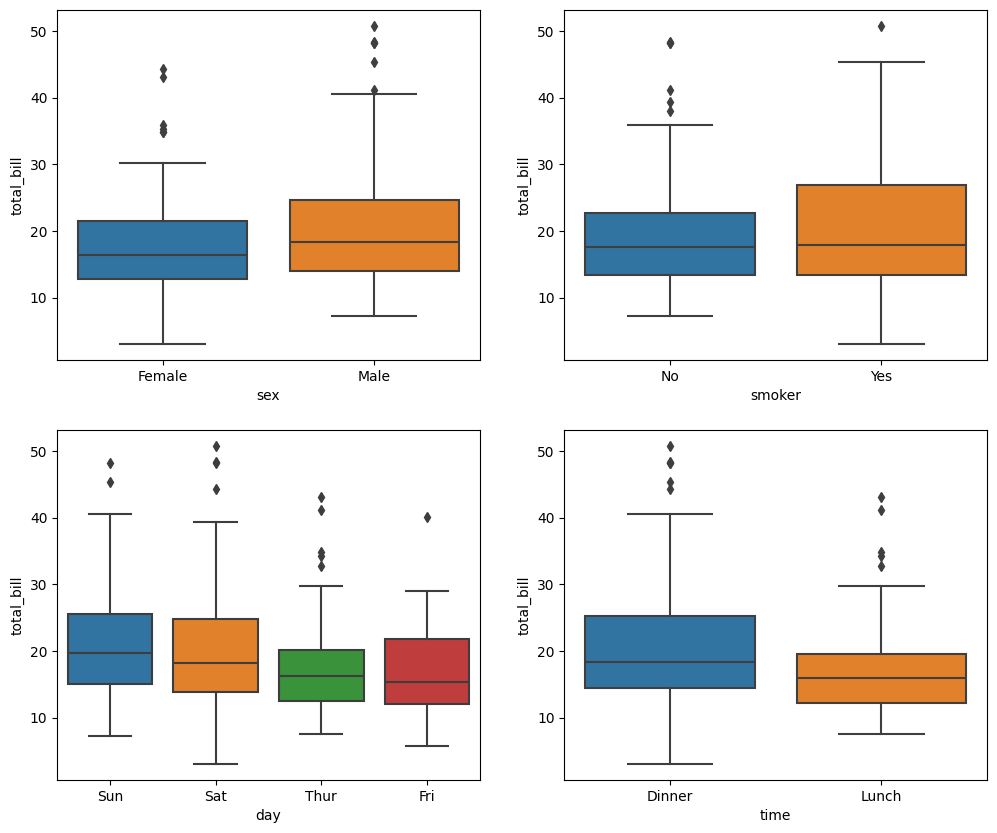

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x='sex', y='total_bill', data=df, ax=axes[0, 0])
sns.boxplot(x='smoker', y='total_bill', data=df, ax=axes[0, 1])
sns.boxplot(x='day', y='total_bill', data=df, ax=axes[1, 0])
sns.boxplot(x='time', y='total_bill', data=df, ax=axes[1, 1])

plt.show()


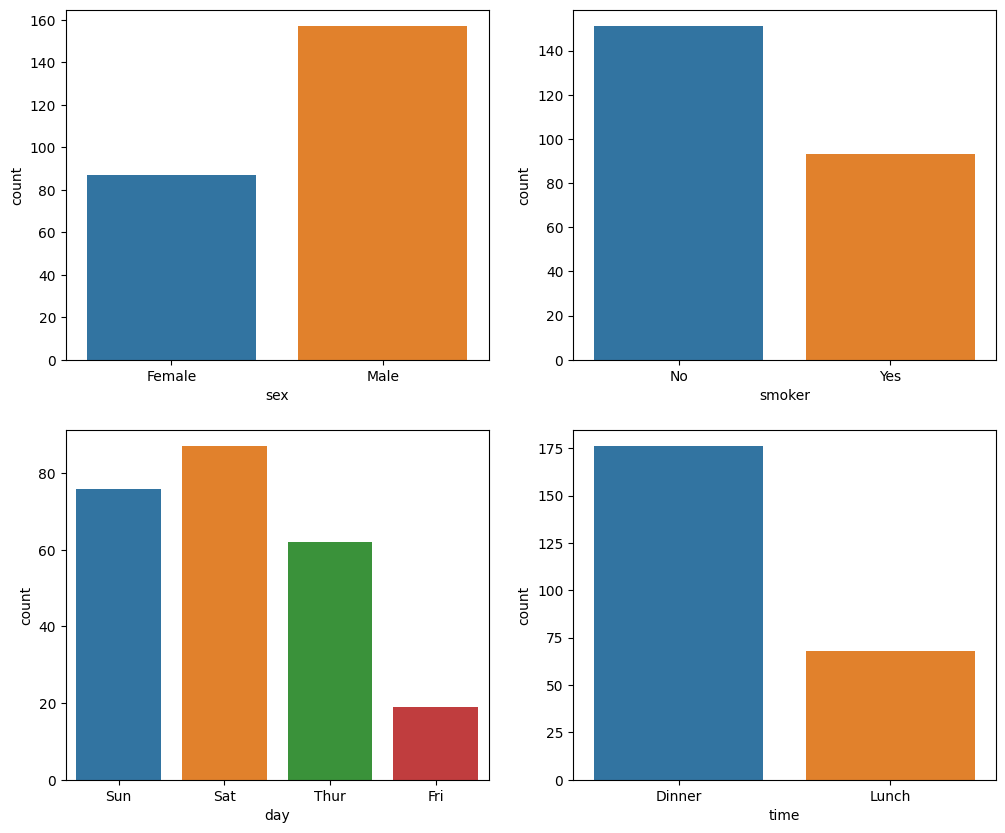

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(x='sex', data=df, ax=axes[0, 0])
sns.countplot(x='smoker', data=df, ax=axes[0, 1])
sns.countplot(x='day', data=df, ax=axes[1, 0])
sns.countplot(x='time', data=df, ax=axes[1, 1])

plt.show()

In [46]:
import plotly.express as px

boxplot_sex = px.box(df, x='sex', y='total_bill', title='Total Bill Distribution by Sex')
boxplot_sex.show()

barplot_day = px.bar(df, x='day', y='tip', title='Average Tip by Day')
barplot_day.show()


In [55]:
boxplot_time = px.box(df, x='time', y='total_bill', title='Total Bill Distribution by Time')
boxplot_time.show()

In [50]:
countplot_smoker = px.histogram(df, x='smoker', title='Count of Smokers and Non-Smokers')
countplot_smoker.update_layout(barmode='group')
countplot_smoker.show()

In [52]:
boxplot_time = px.box(df, x='time', y='total_bill', title='Total Bill Distribution by Time' )
boxplot_time.show()

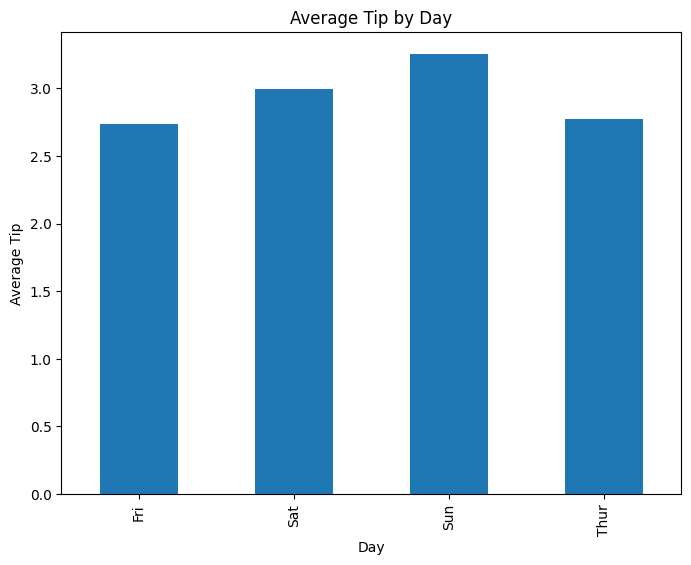

In [54]:
plt.figure(figsize=(8, 6))
df.groupby('day')['tip'].mean().plot(kind='bar', color="#1f77b4")
plt.title('Average Tip by Day')
plt.xlabel('Day')
plt.ylabel('Average Tip')
plt.show()

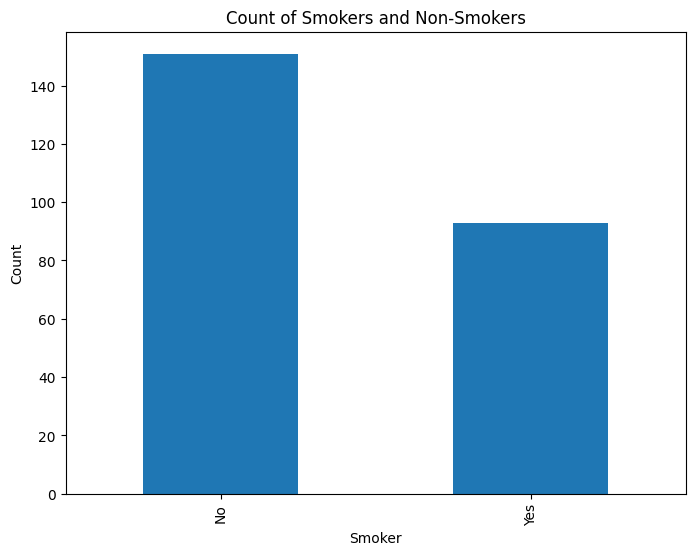

In [56]:
# Countplot to visualize the count of smokers and non-smokers
plt.figure(figsize=(8, 6))
df['smoker'].value_counts().plot(kind='bar')
plt.title('Count of Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

In [65]:
def categorize_tip(tip_amount):
    if tip_amount >= 3:
        return 'High'
    else:
        return 'Low'
df['tip_category'] = df['tip'].apply(categorize_tip)

df

,total_bill,tip,sex,smoker,day,time,size,tip_category
0,16.99,1.01,Female,No,Sun,Dinner,2,Low
1,10.34,1.66,Male,No,Sun,Dinner,3,Low
2,21.01,3.50,Male,No,Sun,Dinner,3,High
3,23.68,3.31,Male,No,Sun,Dinner,2,High
4,24.59,3.61,Female,No,Sun,Dinner,4,High
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,High
240,27.18,2.00,Female,Yes,Sat,Dinner,2,Low
241,22.67,2.00,Male,Yes,Sat,Dinner,2,Low
242,17.82,1.75,Male,No,Sat,Dinner,2,Low


In [73]:

df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100
df['total_amount_paid'] = df['total_bill'] + df['tip']
df['day_type'] = df['day'].apply(lambda x: 'Weekend' if x in ['Sat', 'Sun'] else 'Weekday')
df['smoker_indicator'] = df['smoker'].map({'Yes': 1, 'No': 0})
def party_size_category(size):
    if size <= 2:
        return 'Small'
    elif size <= 4:
        return 'Medium'
    else:
        return 'Large'

df['party_size_category'] = df['size'].apply(party_size_category)



In [74]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_category,tip_percentage,total_amount_paid,day_type,smoker_indicator,party_size_category
0,16.99,1.01,Female,No,Sun,Dinner,2,Low,5.944673,18.00,Weekend,0,Small
1,10.34,1.66,Male,No,Sun,Dinner,3,Low,16.054159,12.00,Weekend,0,Medium
2,21.01,3.50,Male,No,Sun,Dinner,3,High,16.658734,24.51,Weekend,0,Medium
3,23.68,3.31,Male,No,Sun,Dinner,2,High,13.978041,26.99,Weekend,0,Small
4,24.59,3.61,Female,No,Sun,Dinner,4,High,14.680765,28.20,Weekend,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,High,20.392697,34.95,Weekend,0,Medium
240,27.18,2.00,Female,Yes,Sat,Dinner,2,Low,7.358352,29.18,Weekend,1,Small
241,22.67,2.00,Male,Yes,Sat,Dinner,2,Low,8.822232,24.67,Weekend,1,Small
242,17.82,1.75,Male,No,Sat,Dinner,2,Low,9.820426,19.57,Weekend,0,Small


In [80]:
grouped_data = df.groupby(['day_type', 'smoker']).agg({
    'total_bill': ['mean', 'sum'],  
    'tip': 'mean',  
    'size': 'count'   
})
grouped_data

total_bill                tip  size
                      mean      sum      mean count
day_type smoker                                    
Weekday  No      17.219796   843.77  2.685102    49
         Yes     18.076250   578.44  2.881875    32
Weekend  No      20.133922  2053.66  3.139216   102
         Yes     22.162295  1351.90  3.075246    61

In [82]:
grouped_data = df.groupby(['day_type', 'smoker_indicator']).mean()
grouped_data


C:\Users\dell\AppData\Local\Temp\ipykernel_1712\2932163917.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



total_bill       tip      size  tip_percentage  \
day_type smoker_indicator                                                   
Weekday  0                  17.219796  2.685102  2.469388       15.959215   
         1                  18.076250  2.881875  2.218750       16.898192   
Weekend  0                  20.133922  3.139216  2.764706       15.920179   
         1                  22.162295  3.075246  2.508197       16.016083   

                           total_amount_paid  
day_type smoker_indicator                     
Weekday  0                         19.904898  
         1                         20.958125  
Weekend  0                         23.273137  
         1                         25.237541

In [69]:
grouped_gender = df.groupby('sex').agg({
    'tip': 'mean',
    'total_bill': 'sum'
})
grouped_gender

,tip,total_bill
sex,,
Female,2.833448,1570.95
Male,3.089618,3256.82


In [71]:
grouped_data = df.groupby(['sex', 'smoker']).agg({
    'total_bill': ['mean', 'sum'],   
    'tip': 'max',  
    'size': 'count'   
})
grouped_data

total_bill            tip  size
                    mean      sum   max count
sex    smoker                                
Female No      18.105185   977.68   5.2    54
       Yes     17.977879   593.27   6.5    33
Male   No      19.791237  1919.75   9.0    97
       Yes     22.284500  1337.07  10.0    60